In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=12)

In [3]:
print(X.shape,Y.shape)


(500, 2) (500,)


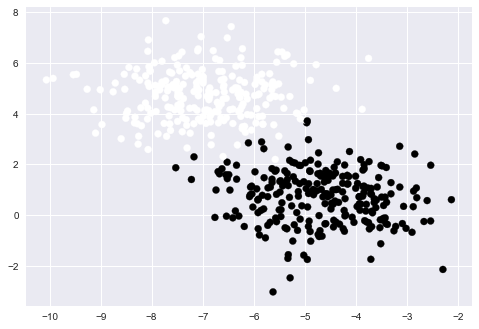

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Model and Helper Function ###

In [5]:
def sigmoid(z):
    return(1.0)/(1+np.exp(-z))

### Implement perceptron learning algorithm###

In [6]:
def predict(X,weights):
    z=np.dot(X,weights)
    return sigmoid(z)

In [7]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

In [8]:
def update(X,Y,weights,learning_rate):
    """perform weight updates for 1 epoch"""
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    
    m=X.shape[0]
    weights=weights-learning_rate*dw/float(m)
    return weights


In [9]:
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    #Modify the input to handle the bias term
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    weights=np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        
        if (epoch%50==0):
            l=loss(X,Y,weights)
            print("Epoch %d loss %.4f"%(epoch,l))
    
    return weights

In [10]:
weights=train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 loss 1.4077
Epoch 50 loss 0.1468
Epoch 100 loss 0.1262
Epoch 150 loss 0.1109
Epoch 200 loss 0.0993
Epoch 250 loss 0.0905
Epoch 300 loss 0.0836
Epoch 350 loss 0.0781
Epoch 400 loss 0.0735
Epoch 450 loss 0.0698
Epoch 500 loss 0.0666
Epoch 550 loss 0.0639
Epoch 600 loss 0.0616
Epoch 650 loss 0.0596
Epoch 700 loss 0.0578
Epoch 750 loss 0.0562
Epoch 800 loss 0.0548
Epoch 850 loss 0.0536
Epoch 900 loss 0.0524
Epoch 950 loss 0.0514


In [11]:
#find the accuracy
def getPredictions(X_Test,weights,labels=True):
    if(X_Test.shape[1]!=weights.shape[0]):
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
        
    probs=predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=.5]=1
        return labels
    

In [12]:
Y_=getPredictions(X,weights,labels=True)

training_accuracy=np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

0.986


In [16]:
#where is the hypothesis line lie
print(weights)
x1=np.linspace(-10,2,15)

##W+Wx1+Wx2=0
x2=-(weights[0]+weights[1]*x1)/weights[2]


[ 9.11592846  0.34989384 -2.61002991]


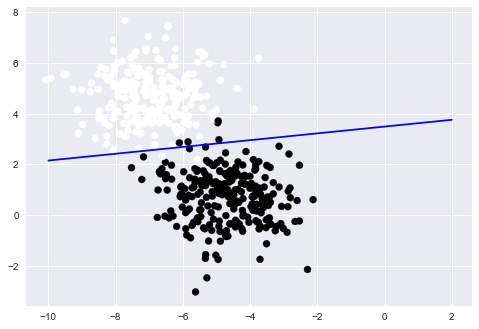

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='blue')
plt.show()

In [18]:
#check for non linear datasets
from sklearn.datasets import make_moons

### Generating Data ###

In [29]:
 X1,Y1=make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=6)

In [30]:
print(X1.shape,Y1.shape)

(500, 2) (500,)


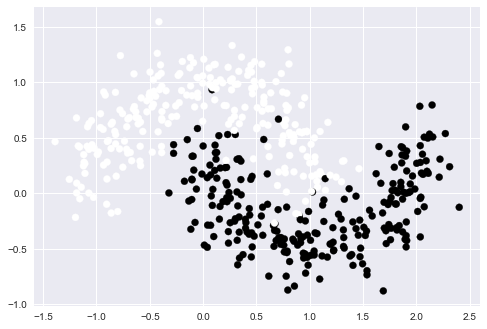

In [31]:
plt.style.use("seaborn")
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.show()

In [32]:
weights1=train(X1,Y1,learning_rate=0.8,maxEpochs=1000)
Y1_=getPredictions(X1,weights1,labels=True)

training_accuracy=np.sum(Y1_==Y1)/Y1.shape[0]
print(training_accuracy)

Epoch 0 loss 0.6191
Epoch 50 loss 0.3074
Epoch 100 loss 0.2881
Epoch 150 loss 0.2821
Epoch 200 loss 0.2798
Epoch 250 loss 0.2788
Epoch 300 loss 0.2783
Epoch 350 loss 0.2780
Epoch 400 loss 0.2779
Epoch 450 loss 0.2779
Epoch 500 loss 0.2778
Epoch 550 loss 0.2778
Epoch 600 loss 0.2778
Epoch 650 loss 0.2778
Epoch 700 loss 0.2778
Epoch 750 loss 0.2778
Epoch 800 loss 0.2778
Epoch 850 loss 0.2778
Epoch 900 loss 0.2778
Epoch 950 loss 0.2778
0.868


In [33]:
print(weights1)
x1=np.linspace(-1.5,2.5,15)

##W+Wx1+Wx2=0
x2=-(weights1[0]+weights1[1]*x1)/weights1[2]

[ 0.61059845  1.30240939 -4.96343532]


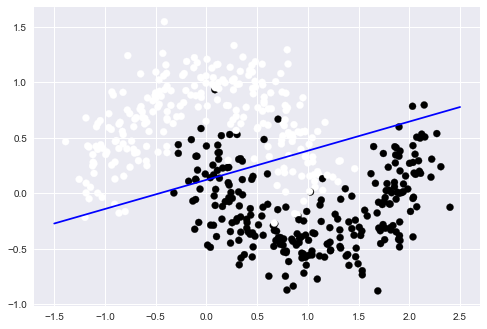

In [34]:
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.plot(x1,x2,c='blue')
plt.show()